In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.interpolate import spline
from matplotlib.ticker import LinearLocator, FormatStrFormatter

path = 'exp_results/'
RWD = 'rewards.npy'
CMP = 'comp_ps.npy'

In [39]:
def smooth_rwd(rwd,ratio=10):
    new_rwd = np.zeros(rwd.shape)
    tmp = rwd[0]
    for i in range(rwd.size):
        tmp = (1-1/ratio)*tmp + 1/ratio*rwd[i]
        new_rwd[i] = tmp
    return new_rwd

C5.2 Bottleneck Effect -- phA
----------

In [118]:
Path_phA1200 = 'Reset_both_11/'
Path_phA1000 = 'Reset_both_01/'
Path_phA800  = 'Reset_both_12/'
Path_phA600  = 'Reset_both_13/'
Path_phA400  = 'Reset_both_14/'
Path_phA200  = 'Reset_both_15/'
Path_phA100  = 'Reset_both_16/'
Path_phA50   = 'Reset_both_17/'
Path_phA1500 = 'Reset_both_18/'
Path_phA2000 = 'Reset_both_19/'
Path_phA5000 = 'Reset_both_20/'

Path_phB4000 = 'Reset_both_10/'
Path_phB3000 = 'Reset_both_09/'
Path_phB2000 = 'Reset_both_01/'
Path_phB1000 = 'Reset_both_05/'
Path_phB800  = 'Reset_both_06/'
Path_phB600  = 'Reset_both_07/'
Path_phB400  = 'Reset_both_08/'


SMOOTH_RATIO = 5

In [141]:
def cmp_avg_std(CMP_phA):
    
    matrix_cmp = CMP_phA.reshape((100,-1))
    averag_cmp = smooth_rwd(np.average(matrix_cmp,axis=1),SMOOTH_RATIO)
    standa_cmp = smooth_rwd(matrix_cmp.std(1), 2*SMOOTH_RATIO)
    return averag_cmp, standa_cmp

In [142]:
CMP_phA5000 = cmp_avg_std(np.load(path+Path_phA5000+CMP))
CMP_phA2000 = cmp_avg_std(np.load(path+Path_phA2000+CMP))
CMP_phA1500 = cmp_avg_std(np.load(path+Path_phA1500+CMP))
CMP_phA1000 = cmp_avg_std(np.load(path+Path_phA1500+CMP))
CMP_phA1200 = cmp_avg_std(np.load(path+Path_phA1200+CMP))
CMP_phA800  = cmp_avg_std(np.load(path+Path_phA800+CMP))
CMP_phA600  = cmp_avg_std(np.load(path+Path_phA600+CMP))
CMP_phA400  = cmp_avg_std(np.load(path+Path_phA400+CMP))
CMP_phA200  = cmp_avg_std(np.load(path+Path_phA200+CMP))
CMP_phA100  = cmp_avg_std(np.load(path+Path_phA100+CMP))
CMP_phA50   = cmp_avg_std(np.load(path+Path_phA50+CMP))

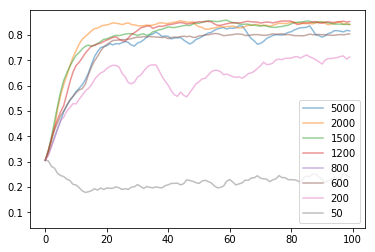

In [143]:
plt.plot(CMP_phA5000[0],label='5000',alpha=0.5)
plt.plot(CMP_phA2000[0],label='2000',alpha=0.5)
plt.plot(CMP_phA1500[0],label='1500',alpha=0.5)
plt.plot(CMP_phA1200[0],label='1200',alpha=0.5)
plt.plot(RWD_phA800[0],label='800',alpha=0.5)
plt.plot(CMP_phA600[0],label='600',alpha=0.5)
plt.plot(CMP_phA200[0],label='200',alpha=0.5)
plt.plot(CMP_phA50[0],label='50',alpha=0.5)
plt.legend()
plt.show()

In [144]:
CONV_SPD = [0, 10]
#CONV_PER = [85, 95]

avg_5000 = CMP_phA5000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_2000 = CMP_phA2000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_1500 = CMP_phA1500[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_1200 = CMP_phA1200[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_1000 = CMP_phA1000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_800  = CMP_phA800[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_600  = CMP_phA600[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_400  = CMP_phA400[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_200  = CMP_phA200[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_100  = CMP_phA100[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_50   = CMP_phA50[0][CONV_SPD[0]:CONV_SPD[1]].mean()

std_5000 = CMP_phA5000[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_2000 = CMP_phA2000[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_1500 = CMP_phA1500[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_1200 = CMP_phA1200[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_1000 = CMP_phA1000[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_800  = CMP_phA800[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_600  = CMP_phA600[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_400  = CMP_phA400[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_200  = CMP_phA200[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_100  = CMP_phA100[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_50   = CMP_phA50[0][CONV_SPD[0]:CONV_SPD[1]].std()

y_plt_avg = np.asarray([avg_50, avg_100, avg_200, avg_400, avg_600, avg_800, avg_1200, avg_1500, avg_2000, avg_5000])
y_plt_std = np.asarray([std_50, std_100, std_200, std_400, std_600, std_800, std_1200, std_1500, std_2000, std_5000])
print('Average and std comp for the first 10 rounds')
print(y_plt_avg)
print(y_plt_std)

Average and std comp for the first 10 rounds
[0.25727605 0.25535794 0.42887398 0.45197116 0.45232491 0.48283667
 0.47973868 0.52493413 0.51589776 0.44078468]
[0.03093376 0.0265759  0.07616244 0.08357275 0.08090286 0.11024643
 0.1080918  0.13522869 0.13850169 0.08500364]


In [145]:
CONV_SPD = [80, 90]

avg_5000 = CMP_phA5000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_2000 = CMP_phA2000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_1500 = CMP_phA1500[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_1200 = CMP_phA1200[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_800  = CMP_phA800[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_600  = CMP_phA600[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_400  = CMP_phA400[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_200  = CMP_phA200[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_100  = CMP_phA100[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_50   = CMP_phA50[0][CONV_SPD[0]:CONV_SPD[1]].mean()

std_5000 = CMP_phA5000[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_2000 = CMP_phA2000[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_1500 = CMP_phA1500[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_1200 = CMP_phA1200[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_800  = CMP_phA800[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_600  = CMP_phA600[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_400  = CMP_phA400[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_200  = CMP_phA200[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_100  = CMP_phA100[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_50   = CMP_phA50[0][CONV_SPD[0]:CONV_SPD[1]].std()

y_plt_avg = np.asarray([avg_50, avg_100, avg_200, avg_400, avg_600, avg_800, avg_1200, avg_1500, avg_2000, avg_5000])
y_plt_std = np.asarray([std_50, std_100, std_200, std_400, std_600, std_800, std_1200, std_1500, std_2000, std_5000])
print('Average comp for the last 10 rounds')
print(y_plt_avg)
print(y_plt_std)

Average comp for the last 10 rounds
[0.23629381 0.23968772 0.71020391 0.83658309 0.79968973 0.84235282
 0.84836477 0.85069136 0.84725021 0.81988355]
[0.01044776 0.01874529 0.00721384 0.00209918 0.002274   0.00149836
 0.00380401 0.00298386 0.00240066 0.01210824]


C5.2 Bottleneck Effect -- phB
----------

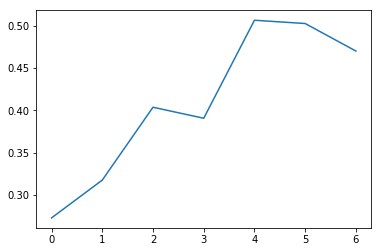

In [148]:
CMP_phB4000 = cmp_avg_std(np.load(path+Path_phB4000+CMP))
CMP_phB3000 = cmp_avg_std(np.load(path+Path_phB3000+CMP))
CMP_phB2000 = cmp_avg_std(np.load(path+Path_phB2000+CMP))
CMP_phB1000 = cmp_avg_std(np.load(path+Path_phB1000+CMP))
CMP_phB800  = cmp_avg_std(np.load(path+Path_phB800+CMP))
CMP_phB600  = cmp_avg_std(np.load(path+Path_phB600+CMP))
CMP_phB400  = cmp_avg_std(np.load(path+Path_phB400+CMP))

CONV_SPD = [0, 10]
#CONV_PER = [85, 95]

Bavg_4000 = CMP_phB4000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
Bavg_3000 = CMP_phB3000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
Bavg_2000 = CMP_phB2000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
Bavg_1000 = CMP_phB1000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
Bavg_800 = CMP_phB800[0][CONV_SPD[0]:CONV_SPD[1]].mean()
Bavg_600 = CMP_phB600[0][CONV_SPD[0]:CONV_SPD[1]].mean()
Bavg_400 = CMP_phB400[0][CONV_SPD[0]:CONV_SPD[1]].mean()

y_plt_avg = np.asarray([Bavg_400, Bavg_600, Bavg_800, Bavg_1000, Bavg_2000,Bavg_3000,Bavg_4000])
plt.plot(y_plt_avg)

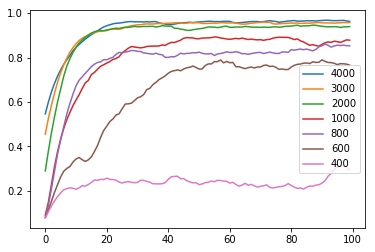

In [157]:
RWD_phB4000 = cmp_avg_std(np.load(path+Path_phB4000+RWD)/64)
RWD_phB3000 = cmp_avg_std(np.load(path+Path_phB3000+RWD)/64)
RWD_phB2000 = cmp_avg_std(np.load(path+Path_phB2000+RWD)/64)
RWD_phB1000 = cmp_avg_std(np.load(path+Path_phB1000+RWD)/64)
RWD_phB800  = cmp_avg_std(np.load(path+Path_phB800+RWD)/64)
RWD_phB600  = cmp_avg_std(np.load(path+Path_phB600+RWD)/64)
RWD_phB400  = cmp_avg_std(np.load(path+Path_phB400+RWD)/64)

plt.plot(RWD_phB4000[0],label='4000')
plt.plot(RWD_phB3000[0],label='3000')
plt.plot(RWD_phB2000[0],label='2000')
plt.plot(RWD_phB1000[0],label='1000')
plt.plot(RWD_phB800[0],label='800')
plt.plot(RWD_phB600[0],label='600')
plt.plot(RWD_phB400[0],label='400')
plt.legend()
plt.show()



In [153]:
RWD_phB400[0].shape

(100,)